In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Auxiliar Functions

In [2]:
def invertChannels(img):
    b,g,r = cv2.split(img) # split channels
    return cv2.merge([r,g,b]) # merge in rgb order to display with matplotlib

In [3]:
# mean square error
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])

    # return the MSE, the lower the error, the more "similar"
    return err

# Iris

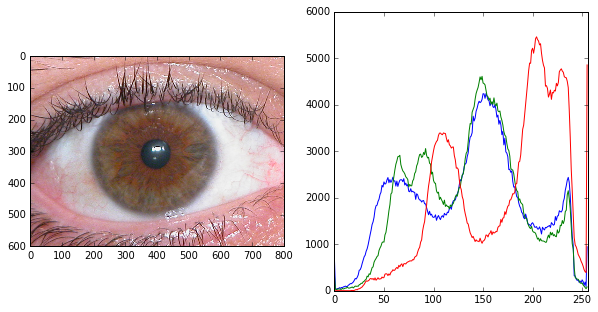

In [6]:
img = cv2.imread('../colorImages/iris.jpg')
img1 = cv2.imread('../colorImages/iris_1.jpg')
img2 = cv2.imread('../colorImages/iris_2.jpg')
img3 = cv2.imread('../colorImages/iris_3.jpg')
img4 = cv2.imread('../colorImages/iris_4.jpg')

plt.figure(figsize=(10,5)) 

plt.subplot(121)
plt.imshow(invertChannels(img))

plt.subplot(122)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])    

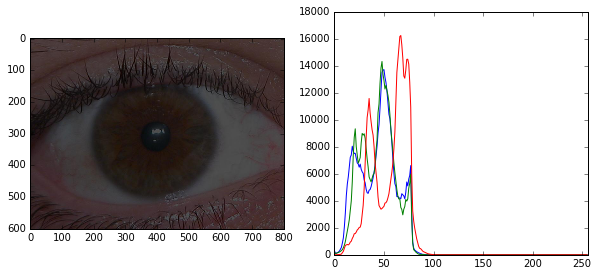

In [10]:
plt.figure(figsize=(10,20)) 
plt.subplot(421);plt.imshow(invertChannels(img1))
plt.subplot(422)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img1],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  

#plt.subplot(423);plt.imshow(invertChannels(img2))
#plt.subplot(424)
#for i,col in enumerate(color):
#    histr = cv2.calcHist([img2],[i],None,[256],[0,256])
#    plt.plot(histr,color = col)
#    plt.xlim([0,256])  
    
#plt.subplot(425);plt.imshow(invertChannels(img3))
#plt.subplot(426)
#for i,col in enumerate(color):
#    histr = cv2.calcHist([img3],[i],None,[256],[0,256])
#    plt.plot(histr,color = col)
#    plt.xlim([0,256])  
    
#plt.subplot(427);plt.imshow(invertChannels(img4))
#plt.subplot(428)
#for i,col in enumerate(color):
#    histr = cv2.calcHist([img4],[i],None,[256],[0,256])
#    plt.plot(histr,color = col)
#    plt.xlim([0,256])  

# Iris_1 Image filtering

In [11]:
# build look up table
high = np.max(img1) - 25 # too generate a litle clipping like original image
low = np.min(img1)

x = np.linspace(0,255,256);

declive = 255./(high - low);
ordenada = - declive * low;
print high
print low
print ordenada
print declive
table = declive * x + ordenada;
table[0:low] = 0;
table[high:256] = 255;

83
0
-0.0
3.07228915663


In [12]:
table = np.array([table.astype('uint8')])

In [13]:
img1_r2 = cv2.LUT(img1,table)

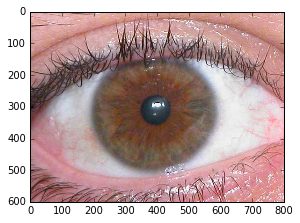

In [22]:
plt.figure(figsize=(10,10)) 
plt.subplot(121);plt.imshow(invertChannels(img1_r2))


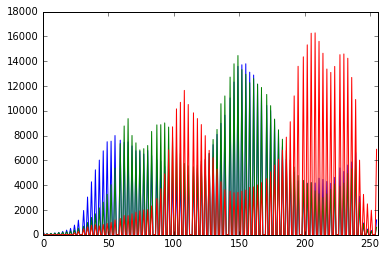

In [281]:
for i,col in enumerate(color):
    histr = cv2.calcHist([img1_r2],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])  

In [287]:
# mean square error comparation
print "MSE between Original and Iris1: %s" % mse(img,img1)
print "MSE between Original and Iris enchanced: %s" % mse(img,img1_r2)

MSE between Original and Iris1: 34445.6808563
MSE between Original and Iris enchanced: 176.778952083
